# PA006 - Estratégia de Marketing para clientes de um Banco

## Planejamento da solução

### Entrada

1 - Problema de Negócio<br>
- criação de uma estratégia de marketing para abordar os clientes que usam cartão de crédito<br>

2 - Conjunto de dados<br>
- conjunto de dados sobre o comportamento de uso de aproximadamente 9000 usuários de cartão de crédito ativos, durante os últimos 6 meses<br>


### Saida

- Listar os clientes com melhor performace no uso do cartão
- Criar uma classificação dos clientes novos com base no seu perfil

Responder as perguntas de negócio

- Criar uma segmentação de clientes baseado em critérios claros de seleção.
- Tornar a segmentação de clientes acessível para o time de operações.
- Ensinar o time de operações sobre como usar a sua solução.
- Transferir o conhecimento para os Cientistas de Dados da International Bank.
- Recomendar 2-3 alavancas de negócio para cada segmento de clientes.

### Tarefas

Criar uma segmentação de clientes baseado em critérios claros de seleção.
- Quais são os critérios claros de seleção ?
- O que é um critério claro ?


Tornar a segmentação de clientes acessível para o time de operações.
- Como a operação é feita hoje?
- Onde o time de operações teria mais acessibilidade a análise do cliente ?


Ensinar o time de operações sobre como usar a sua solução.


Transferir o conhecimento para os Cientistas de Dados da International Bank.


Recomendar 2-3 alavancas de negócio para cada segmento de clientes.
- Cashback para pagamentos em dia
- Zerar anuidades para clientes com compras frequentes
- Criar um aplicativo onde mostre claramente a evolução de compras do cliente
- Vincular o limite do cartão ao valor investido em poupanças, CDB, Tesouro direto, etc.
- Criar seu próprio "shop" de produtos: Ver o que mais os clientes compram e conversar com estes fornecedores para vender seus produtos na plataforma própria do cartão.

## Benchmarck de soluções

### pesquisa de soluções

o segredo do CRM é ouvir e aprender, e não dizer e vender.
O CRM trata de dar poder ao cliente, encantá-lo e deixar que ele sinta como se sua interação
com a marca estivesse sob seu controle

O CRM permite que o cliente se sinta único, valorizado pela marca e, acima de tudo,
satisfeito. O cliente que teve suas necessidades atendidas, certamente terá uma predisposição
maior em eleger em primeiro lugar a marca com a qual ele tem um relacionamento. Isto é de
suma importância para a organização, que automaticamente terá uma vantagem competitiva
sobre seus concorrentes

Ao segmentar clientes a forca comercial pode focar seus esforços no perfil ideal de prospect, aquele cujas dores que mais se encaixam nas soluções da empresa e que, além disso, podem gerar mais lucro para a empresa. Dessa forma, é possível direcionar campanhas e bordagens, converter e reter mais clientes. 

Recencia / Frequência / Monetização - Modelo RFM
- Tempo deste a última compra
- Engajamento do cliente - o quanto este cliente interaje com a empresa -quantos produtos comprou
- Total gasto, faturamento

# 0 - Importações e Funções

## 0.1 - Importações

In [4]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import xgboost             as xgb
import bamboolib           as bam
import matplotlib.pyplot   as plt
import matplotlib.gridspec as GridSpec
import math
import warnings

from IPython.core.display  import display, HTML
from sklearn.metrics       import silhouette_score
from pandas_profiling      import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans
from sklearn.decomposition import PCA
from sklearn               import metrics

from scipy.spatial.distance import cdist


%matplotlib inline

## 0.2 - Funções

In [5]:
# formatar numeros floats para não exibir notação cientifica. Usar 2 decimais
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# Função para uso do Jupyter Notebook
def jupyter_settings():
    #warnings.filterwarnings('ignore')
    #%matplotlib inline
    #%pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    #pd.options.display.max_columns = None
    #pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

## 0.3 - Importar dados

In [7]:
df0_raw = pd.read_csv("data/raw/CC_GENERAL.csv", sep=",", low_memory=False)

In [8]:
bam

BamboolibModuleWindow(children=(Window(children=(VBox(children=(VBox(children=(Button(description='Read CSV fi…

In [5]:
df0_raw.head(10).T

0       1       2       3       4       5        6       7       8        9
CUST_ID                           C10001  C10002  C10003  C10004  C10005  C10006   C10007  C10008  C10009   C10010
BALANCE                            40.90 3202.47 2495.15 1666.67  817.71 1809.83   627.26 1823.65 1014.93   152.23
BALANCE_FREQUENCY                   0.82    0.91    1.00    0.64    1.00    1.00     1.00    1.00    1.00     0.55
PURCHASES                          95.40    0.00  773.17 1499.00   16.00 1333.28  7091.01  436.20  861.49  1281.60
ONEOFF_PURCHASES                    0.00    0.00  773.17 1499.00   16.00    0.00  6402.63    0.00  661.49  1281.60
INSTALLMENTS_PURCHASES             95.40    0.00    0.00    0.00    0.00 1333.28   688.38  436.20  200.00     0.00
CASH_ADVANCE                        0.00 6442.95    0.00  205.79    0.00    0.00     0.00    0.00    0.00     0.00
PURCHASES_FREQUENCY                 0.17    0.00    1.00    0.08    0.08    0.67     1.00    1.00    0.33     0.17
ONEOFF_PURCHASES_FREQUENCY          0.00    0.00    1.00    0.08    0.08    0.00     1.00    0.00    0.08     0.17
PURCHASES_INSTALLMENTS_FREQUENCY    0.08    0.00    0.00    0.00    0.00    0.58     1.00    1.00    0.25     0.00
CASH_ADVANCE_FREQUENCY              0.00    0.25    0.00    0.08    0.00    0.00     0.00    0.00    0.00     0.00
CASH_ADVANCE_TRX                       0       4       0       1       0       0        0       0       0        0
PURCHASES_TRX                          2       0      12       1       1       8       64      12       5        3
CREDIT_LIMIT                     1000.00 7000.00 7500.00 7500.00 1200.00 1800.00 13500.00 2300.00 7000.00 11000.00
PAYMENTS                          201.80 4103.03  622.07    0.00  678.33 1400.06  6354.31  679.07  688.28  1164.77
MINIMUM_PAYMENTS                  139.51 1072.34  627.28     NaN  244.79 2407.25   198.07  532.03  311.96   100.30
PRC_FULL_PAYMENT                    0.00    0.22    0.00    0.00    0.00    0.00     1.00    0.00    0.00     0.00
TENURE                                12      12      12      12      12      12       12      12      12       12

# 1 - Descrição dos Dados

In [6]:
df1 = df0_raw.copy()

## 1.1 - Dimensão dos dados

In [7]:
print ( 'nro Linhas {}'.format( df1.shape[0]))
print ( 'nro Colunas {}'.format( df1.shape[1]))

nro Linhas 8950
nro Colunas 18


## 1.2 Tipagem dos dados

In [8]:
df1.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## 1.3 - Conferir dados nulos

In [9]:
df1.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## 1.4 - Preencher dados faltantes

In [10]:
# onde for nulo coloca a média dos valores
df1['CREDIT_LIMIT'].fillna((df1['CREDIT_LIMIT'].mean()), inplace=True)

In [11]:
df1['MINIMUM_PAYMENTS'].fillna((df1['MINIMUM_PAYMENTS'].mean()), inplace=True)

## 1.5 - Converter tipos de dados

In [12]:
 # Deixa os nomes das colunas em minúsculo
df1.columns = df1.columns.str.lower()

# 2 - Características do Negócio

In [13]:
df2 = df1.copy()

# 3 - Filtragem dos dados

In [14]:
df3 = df2.copy()

### 3.1 - Dados Numéricos

In [15]:
# separa atributos numéricos
num_att = df3.select_dtypes( include = ['int64','int32', 'float64'] )
# separa atributos categóricos
cat_att = df3.select_dtypes( exclude = ['int64', 'int32', 'float64', 'datetime64[ns]'] )

In [16]:
# tendencia central - média e mediana
ct1 = pd.DataFrame (num_att.apply( np.mean ) ).T
ct2 = pd.DataFrame (num_att.apply( np.median ) ).T
# dispersão - desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_att.apply (np.std) ).T
d2 = pd.DataFrame(num_att.apply (min ) ).T
d3 = pd.DataFrame(num_att.apply (max ) ).T
d4 = pd.DataFrame(num_att.apply (lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_att.apply (lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_att.apply (lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, ct1, ct2, d1, d5, d6, d4] ).T.reset_index()
m.columns = ['Atributos', 'min', 'max','media','Mediana','desv.Padrao','vies','curtose','Range']

In [17]:
m

Atributos   min      max   media  Mediana  desv.Padrao  vies  curtose    Range
0                            balance  0.00 19043.14 1564.47   873.39      2081.42  2.39     7.67 19043.14
1                  balance_frequency  0.00     1.00    0.88     1.00         0.24 -2.02     3.09     1.00
2                          purchases  0.00 49039.57 1003.20   361.28      2136.52  8.14   111.39 49039.57
3                   oneoff_purchases  0.00 40761.25  592.44    38.00      1659.80 10.05   164.19 40761.25
4             installments_purchases  0.00 22500.00  411.07    89.00       904.29  7.30    96.58 22500.00
5                       cash_advance  0.00 47137.21  978.87     0.00      2097.05  5.17    52.90 47137.21
6                purchases_frequency  0.00     1.00    0.49     0.50         0.40  0.06    -1.64     1.00
7         oneoff_purchases_frequency  0.00     1.00    0.20     0.08         0.30  1.54     1.16     1.00
8   purchases_installments_frequency  0.00     1.00    0.36     0.17         0.40  0.51    -1.40     1.00
9             cash_advance_frequency  0.00     1.50    0.14     0.00         0.20  1.83     3.33     1.50
10                  cash_advance_trx  0.00   123.00    3.25     0.00         6.82  5.72    61.65   123.00
11                     purchases_trx  0.00   358.00   14.71     7.00        24.86  4.63    34.79   358.00
12                      credit_limit 50.00 30000.00 4494.45  3000.00      3638.41  1.52     2.84 29950.00
13                          payments  0.00 50721.48 1733.14   856.90      2894.90  5.91    54.77 50721.48
14                  minimum_payments  0.02 76406.21  864.21   335.63      2330.46 13.87   294.38 76406.19
15                  prc_full_payment  0.00     1.00    0.15     0.00         0.29  1.94     2.43     1.00
16                            tenure  6.00    12.00   11.52    12.00         1.34 -2.94     7.69     6.00

In [18]:
df3.describe()

balance  balance_frequency  purchases  oneoff_purchases  installments_purchases  cash_advance  purchases_frequency  oneoff_purchases_frequency  purchases_installments_frequency  cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  payments  minimum_payments  prc_full_payment  tenure
count  8950.00            8950.00    8950.00           8950.00                 8950.00       8950.00              8950.00                     8950.00                           8950.00                 8950.00           8950.00        8950.00       8950.00   8950.00           8950.00           8950.00 8950.00
mean   1564.47               0.88    1003.20            592.44                  411.07        978.87                 0.49                        0.20                              0.36                    0.14              3.25          14.71       4494.45   1733.14            864.21              0.15   11.52
std    2081.53               0.24    2136.63           1659.89                  904.34       2097.16                 0.40                        0.30                              0.40                    0.20              6.82          24.86       3638.61   2895.06           2330.59              0.29    1.34
min       0.00               0.00       0.00              0.00                    0.00          0.00                 0.00                        0.00                              0.00                    0.00              0.00           0.00         50.00      0.00              0.02              0.00    6.00
25%     128.28               0.89      39.63              0.00                    0.00          0.00                 0.08                        0.00                              0.00                    0.00              0.00           1.00       1600.00    383.28            170.86              0.00   12.00
50%     873.39               1.00     361.28             38.00                   89.00          0.00                 0.50                        0.08                              0.17                    0.00              0.00           7.00       3000.00    856.90            335.63              0.00   12.00
75%    2054.14               1.00    1110.13            577.40                  468.64       1113.82                 0.92                        0.30                              0.75                    0.22              4.00          17.00       6500.00   1901.13            864.21              0.14   12.00
max   19043.14               1.00   49039.57          40761.25                22500.00      47137.21                 1.00                        1.00                              1.00                    1.50            123.00         358.00      30000.00  50721.48          76406.21              1.00   12.00

In [19]:
# análise descritiva
# após a criação do arquivo não precisa rodar toda vez que executa o notebook
#profile = ProfileReport(df3, title="Análise descritiva - Internation Bank Data")
#profile.to_file('./reports/analise_descritiva.html')

## 3.2 - Dados categóricos

In [20]:
# apenas id do cliente é categórica - 
# Não há o que fazer a não ser removê-la, não é relevante para o modelo
cat_att.head()

cust_id
0  C10001
1  C10002
2  C10003
3  C10004
4  C10005

## 3.3 - Filtros

In [21]:
# Deleta a coluna com a identificação do cliente
df3 = df3.drop(columns='cust_id')

# 4 - Análise exploratória

In [22]:
df4 = df3.copy()

## 3.1 Distribuição univariada

### 3.1.1 - Geral

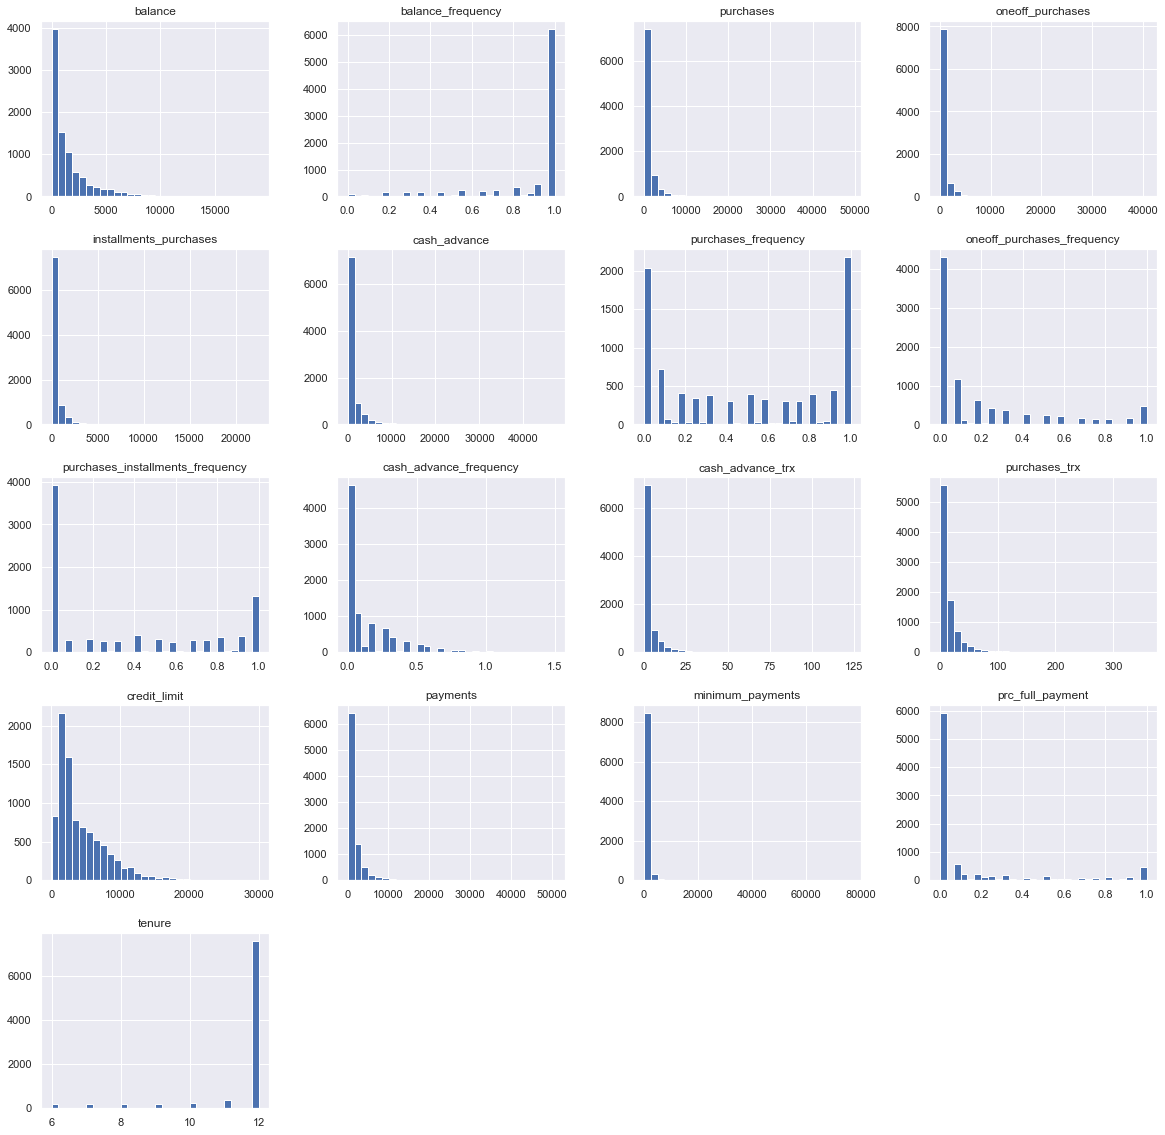

In [23]:
df4.hist(bins=30, figsize=[20,20]);

### 3.1.2 - Variável Balance

C:\Users\Fred\.conda\envs\PA006\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Fred\.conda\envs\PA006\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


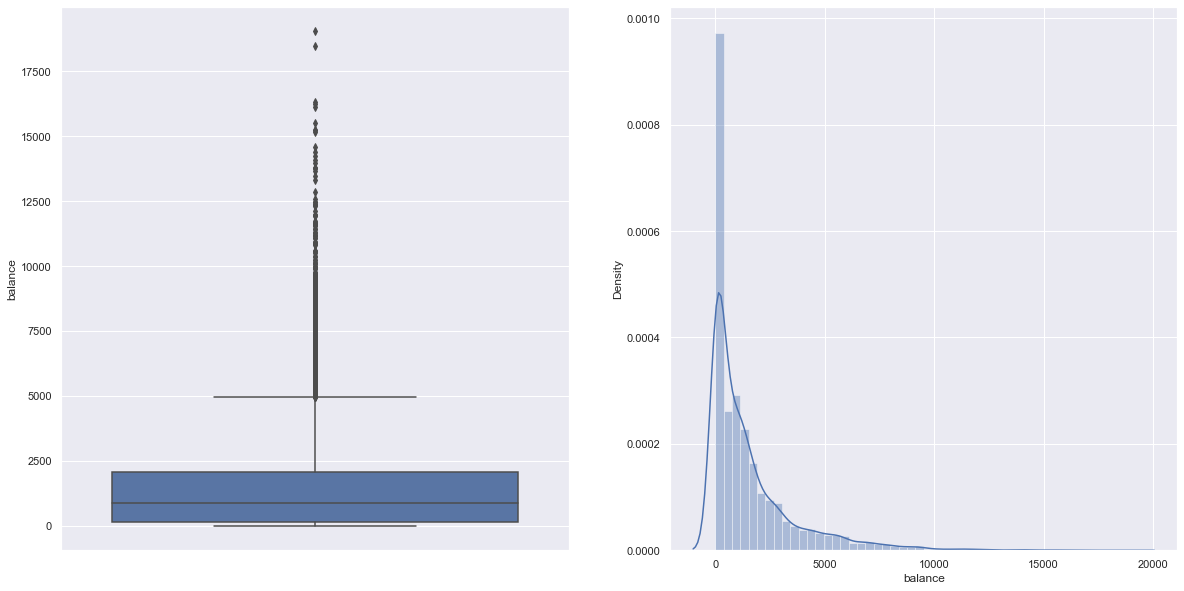

In [24]:
plt.subplot(1,2,1)
sns.boxplot(y=df4['balance'], orient='h')
plt.subplot(1,2,2)
sns.distplot(df4['balance']);

## 3.2 - Bivariada

## 3.2 - Tenure x Balance

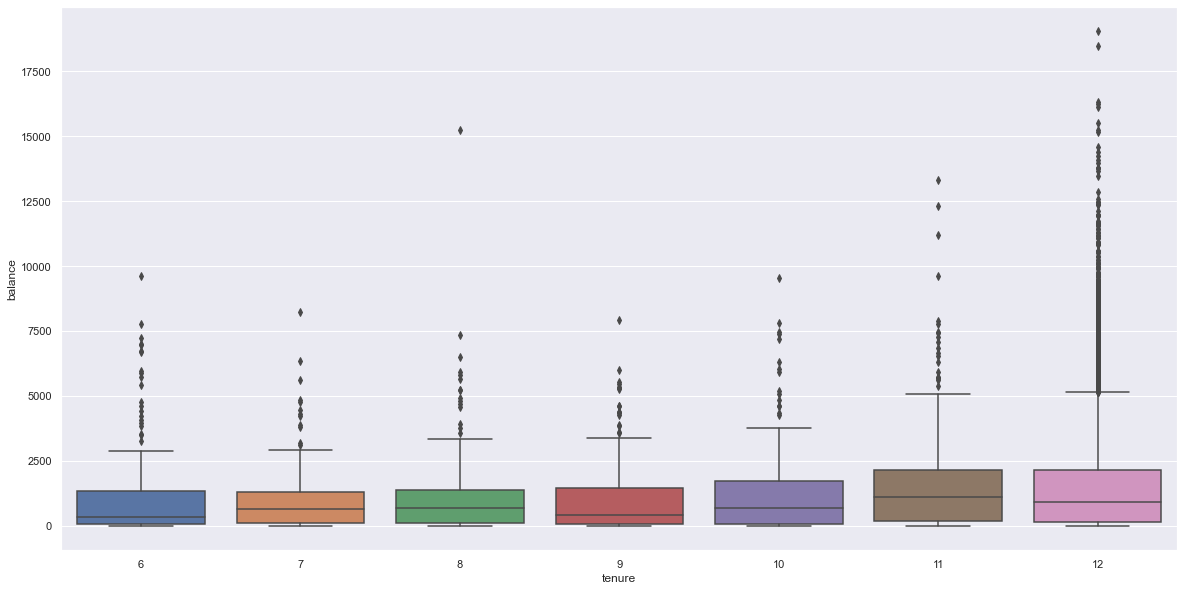

In [25]:
sns.boxplot(x='tenure',y='balance',data=df4);

## 3.3 - Dispersão

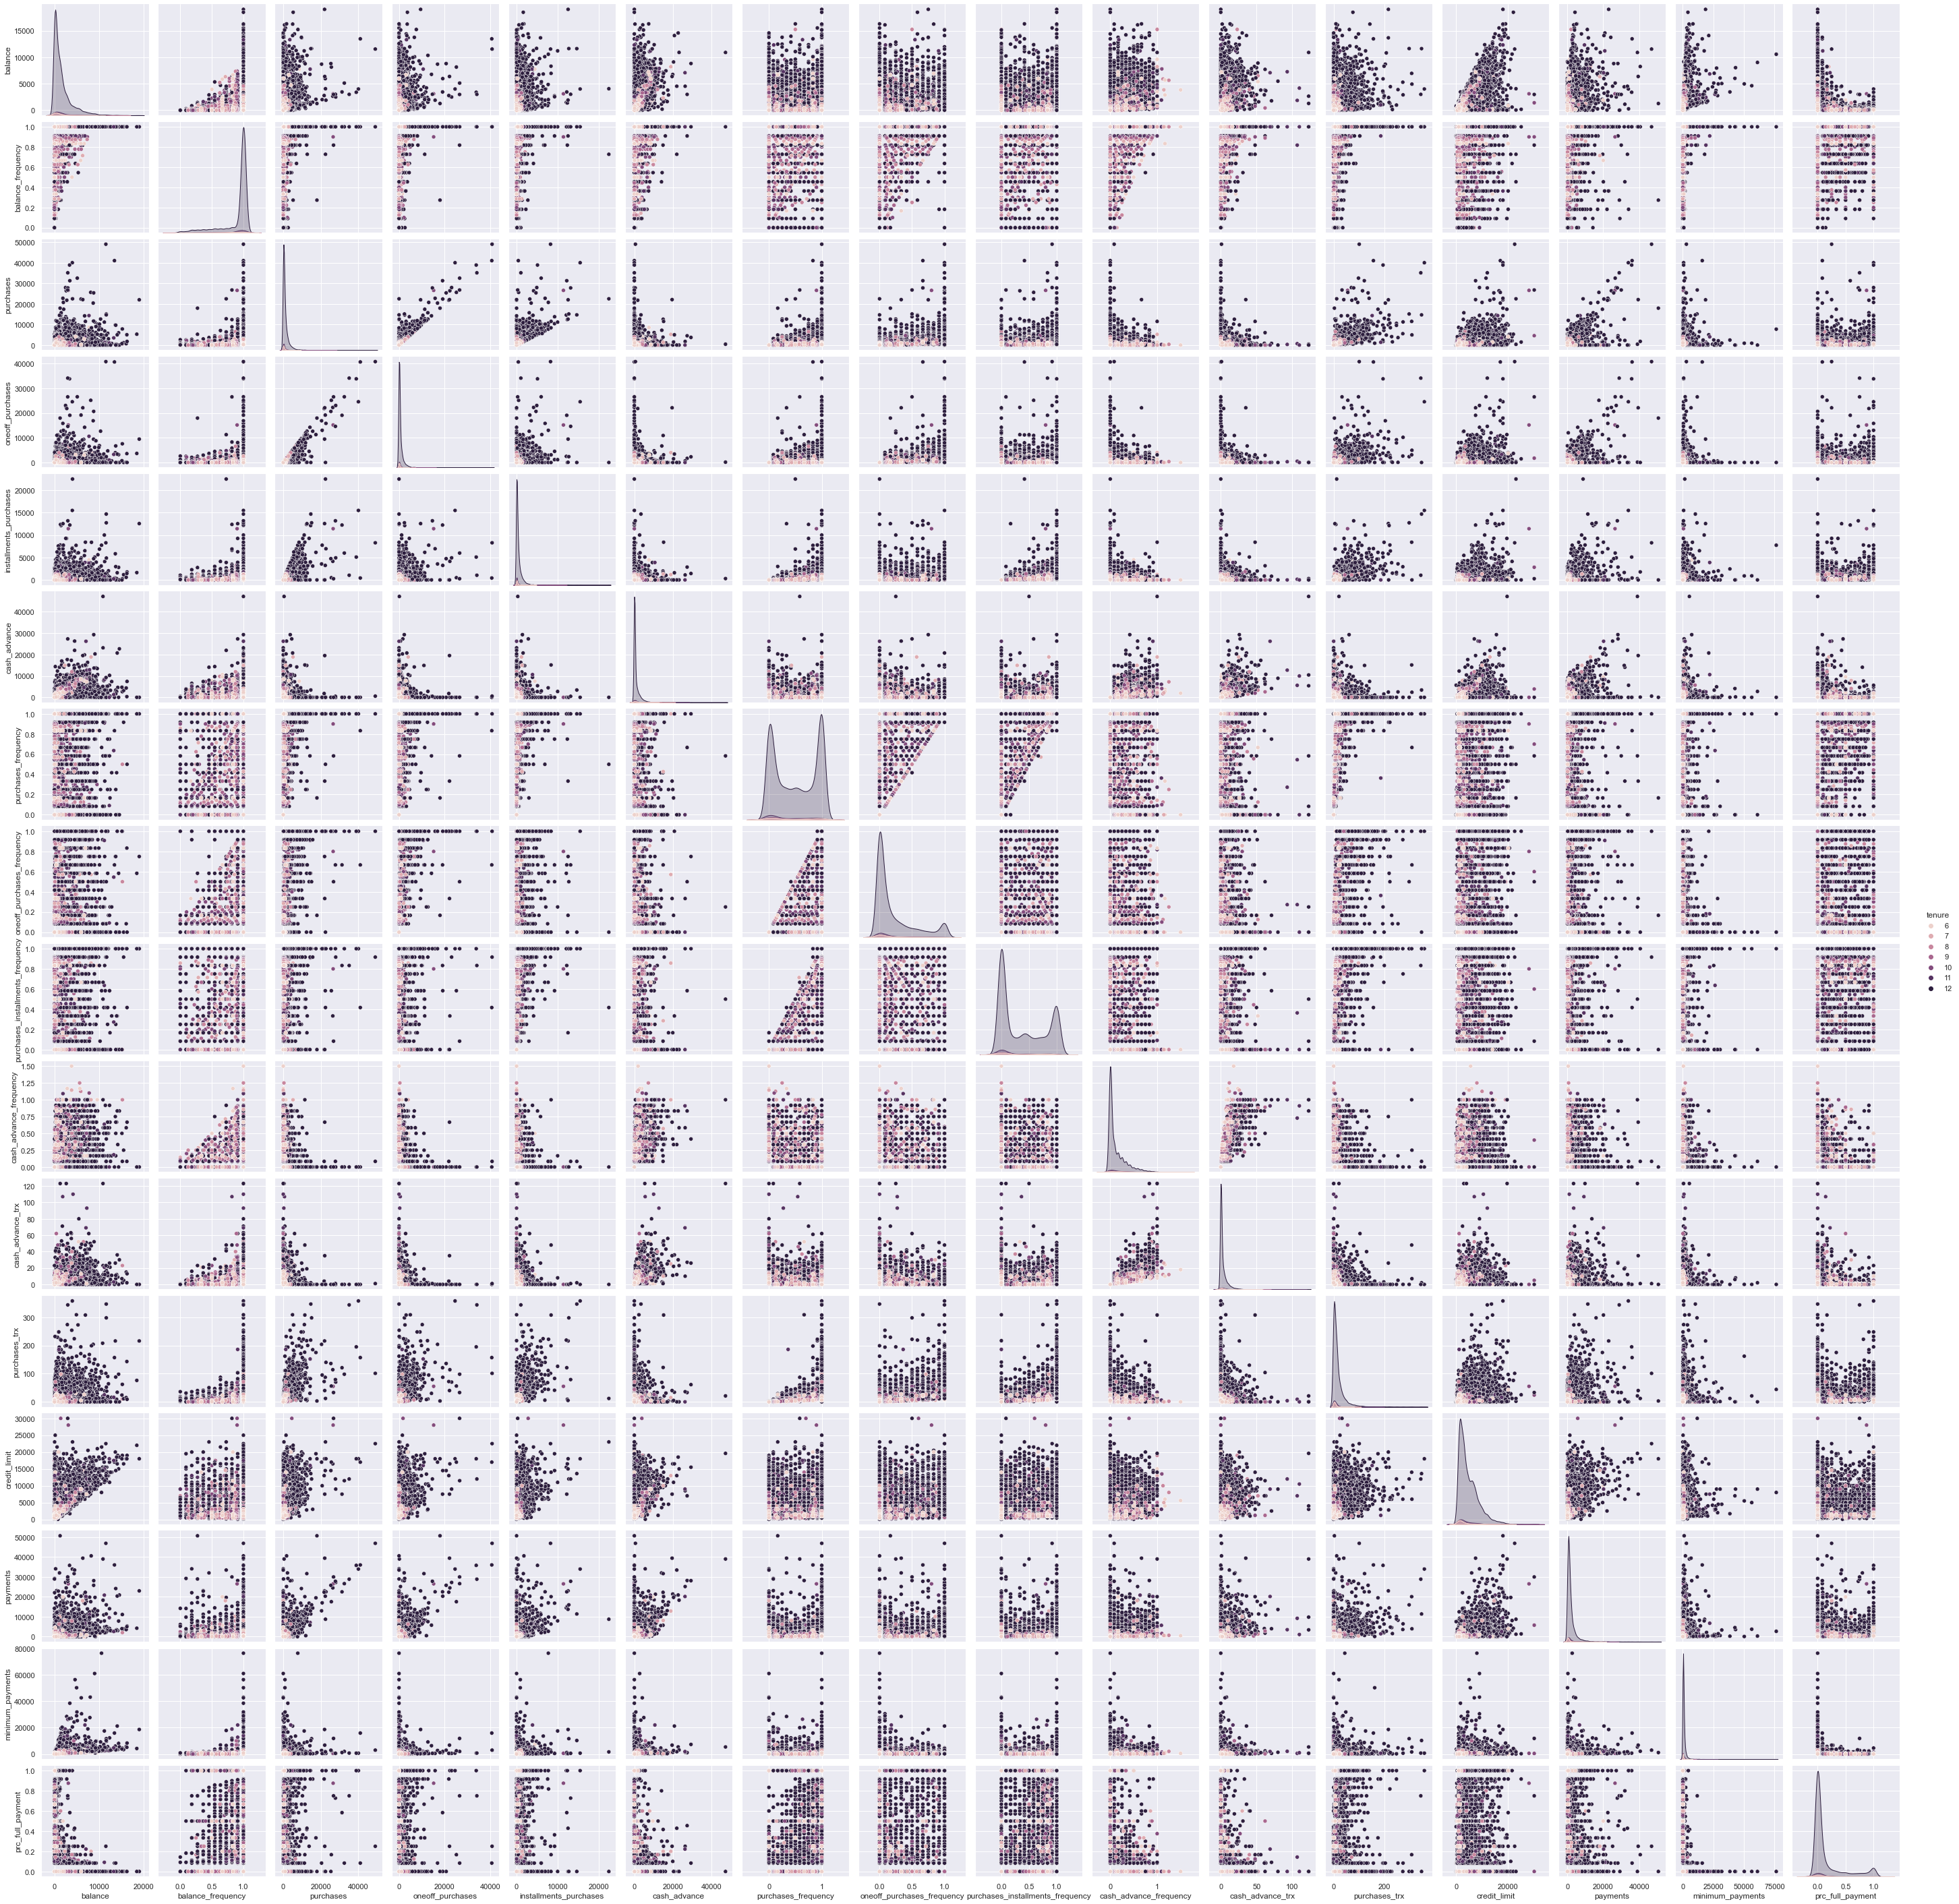

In [26]:
sns.pairplot(data=df4, hue='tenure');

## 3.4 - Correlação de pearson

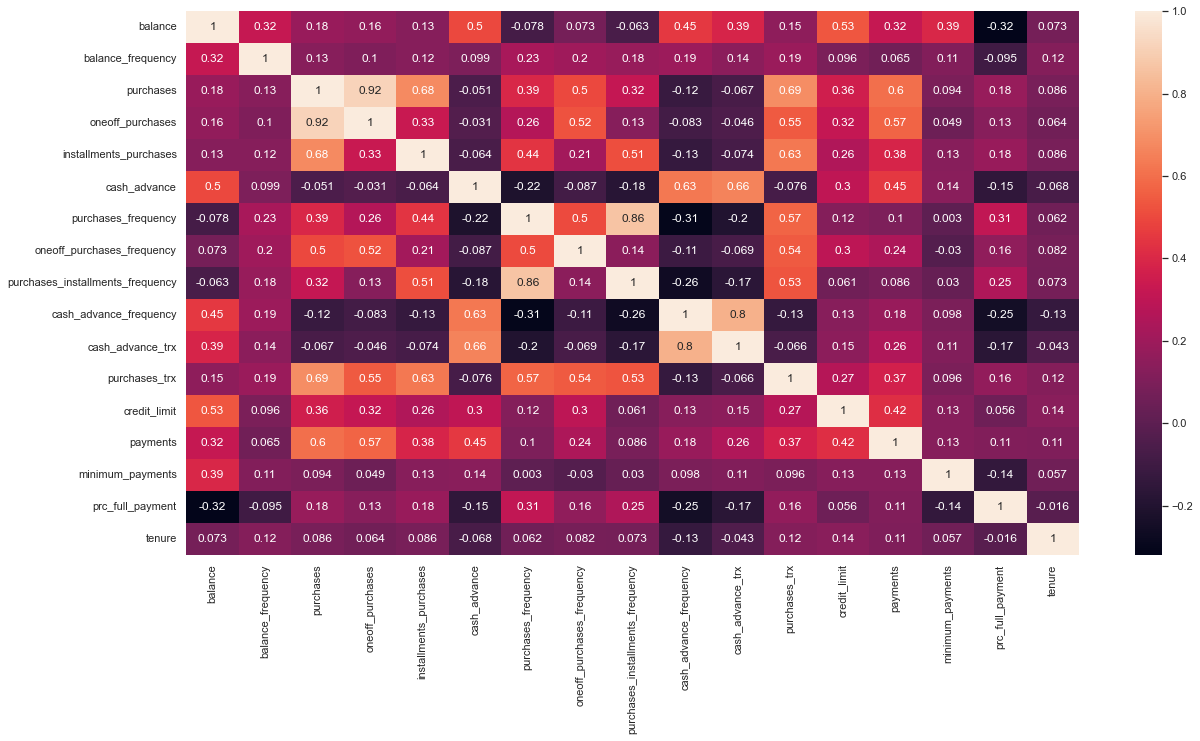

In [27]:
sns.heatmap(df4.corr(method='pearson'),annot=True);

# 5 - Preparação dos dados

In [28]:
df5 = df4.copy()

## Normalização

In [29]:
scaler = StandardScaler()
df5_std = scaler.fit_transform(df5)

In [30]:
df5_std

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Análise de componentes principais - PCA

In [31]:
pca = PCA(2)
scores_pca = pca.fit_transform(df5)

scores_pca.shape

(8950, 2)

# 6 - Seleção de variáveis

In [32]:
df6 = df5.copy()

## Seleção de atributos

In [33]:
# escolha de variáveis com base na correlação
#colsCorrelacao = ['balance', 'balance_frequency', 'purchases','cash_advance','purchases_installments_frequency', 'credit_limit', 'payments', 'minimum_payments','tenure']

# 7 - Modelos de Machine Learning

In [34]:
df7 = df6.copy()

## kmeans

In [35]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 21)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(scores_pca)
    kmeanModel.fit(scores_pca)

    distortions.append(sum(np.min(cdist(scores_pca, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / scores_pca.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(scores_pca, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / scores_pca.shape[0]
    mapping2[k] = kmeanModel.inertia_


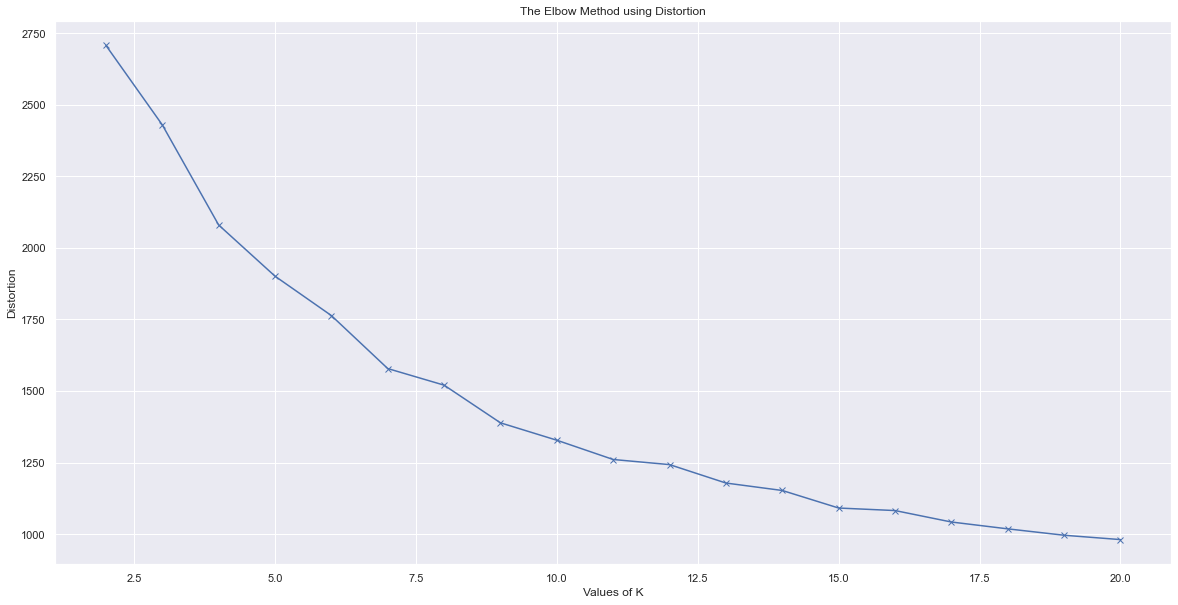

In [36]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [37]:
## https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

In [38]:
iners = []
lista = {}
K = range(2, 21)
for k in K:
    kmodel = KMeans(n_clusters=k).fit(scores_pca)
    iners.append(kmodel.inertia_)
    lista[k] = kmodel.inertia_

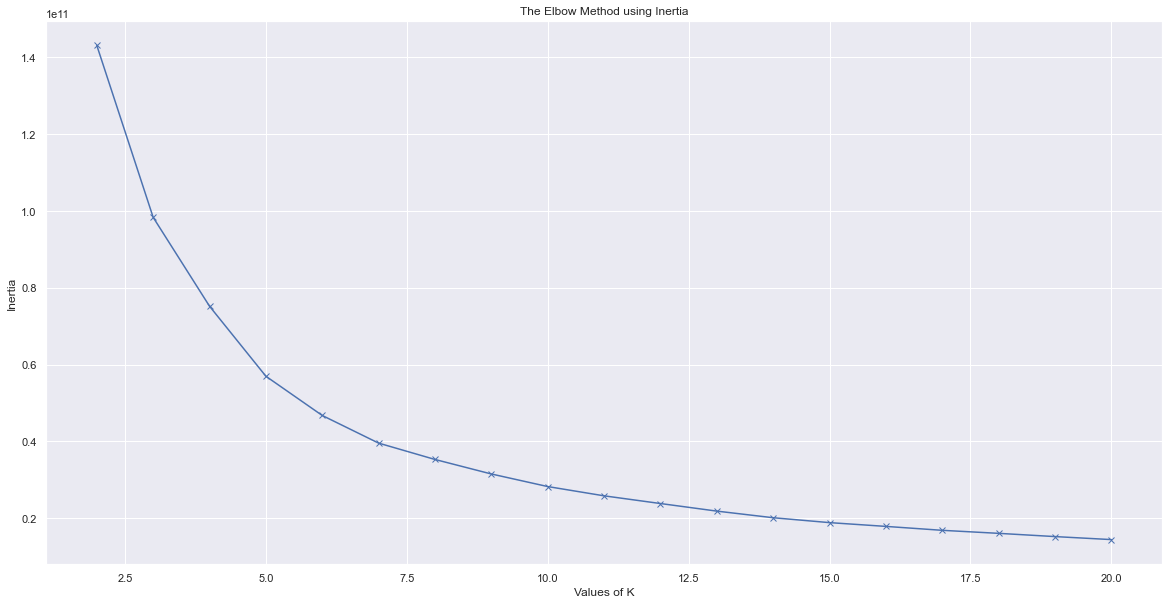

In [39]:
plt.plot(K, iners, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Treinar modelo

In [40]:
model = KMeans(n_clusters=6)
model.fit(scores_pca)

centers = model.cluster_centers_

## Visualização

In [41]:
 df = pd.DataFrame(centers)

In [42]:
df_pca = pd.DataFrame(data=scores_pca, columns=['pca1','pca2'])
df_pca['cluster'] = model.labels_

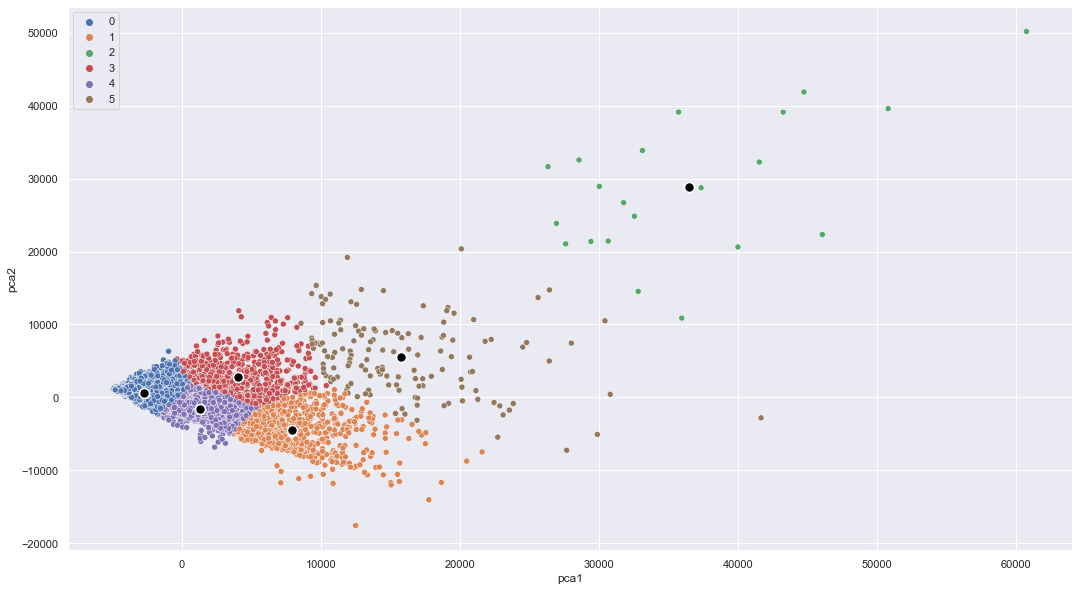

In [43]:
plt.figure(figsize=[18,10])
sns.scatterplot(data=df_pca, x='pca1',y='pca2', hue = 'cluster', palette='deep')
sns.scatterplot(data=df, x=0,y=1, s=400, color="black", marker=".")
plt.show()

## Avaliação do modelo

In [44]:
labels = model.labels_

silhouette_score(scores_pca,labels,metric='euclidean')

0.5123875372547331

In [45]:
 df7['cluster'] = model.labels_

In [46]:
pie_chart_cluster = df7.groupby('cluster').count().reset_index()
pie_chart_purchases = df7.groupby('cluster').purchases.mean().reset_index()

Percentual de clientes por cluster


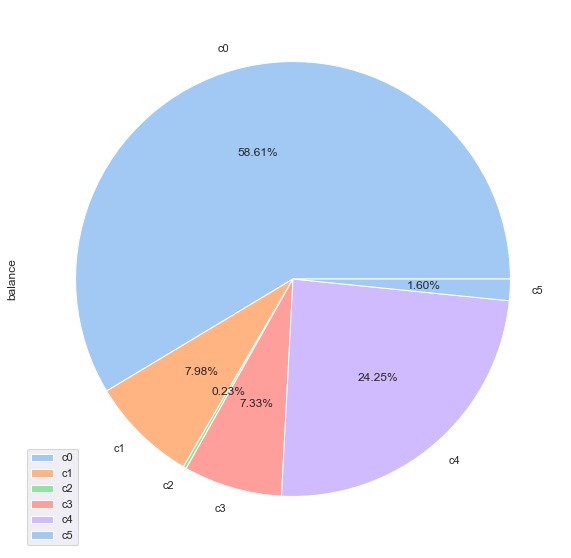

In [47]:
pie_chart_cluster.plot.pie(y='balance',
                           autopct='%.2f%%',
                           labels=['c0','c1', 'c2', 'c3', 'c4', 'c5'],
                           colors=sns.color_palette('pastel')[0:5]);
print("Percentual de clientes por cluster")

Percentual de participação na média de compras por cluster


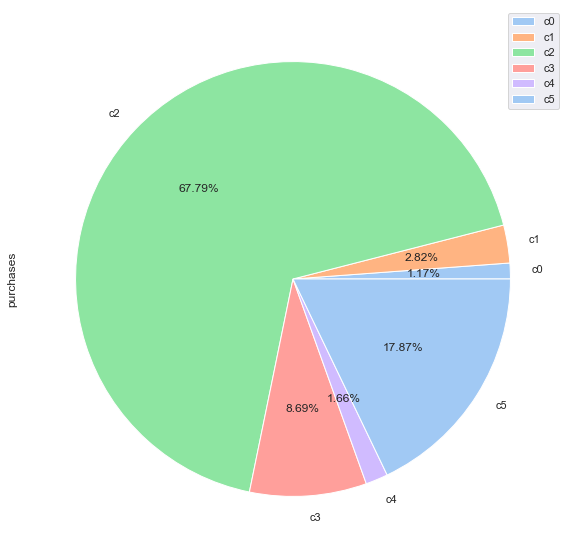

In [48]:
pie_chart_purchases.plot.pie(y='purchases',
                             autopct='%.2f%%',
                             labels=['c0','c1', 'c2', 'c3', 'c4', 'c5'],
                             colors=sns.color_palette('pastel')[0:5]);
print("Percentual de participação na média de compras por cluster")

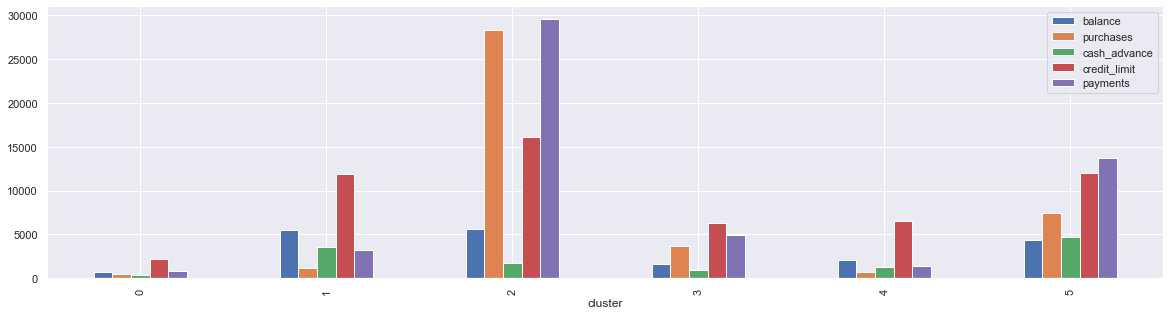

In [50]:
cols_importance = ['cluster','balance','purchases','cash_advance','credit_limit','payments']
df7[cols_importance].groupby('cluster').aggregate('mean').plot.bar(figsize=(20,5));

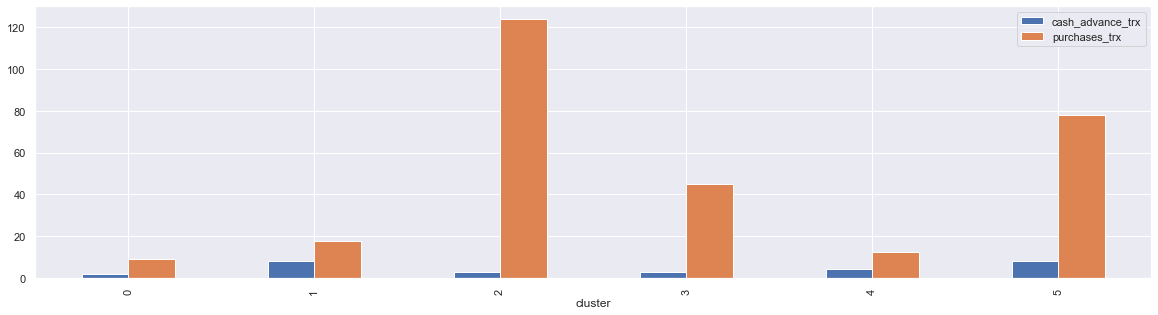

In [51]:
 df7[['cash_advance_trx','purchases_trx','cluster']].groupby('cluster').aggregate('mean').plot.bar(figsize=(20,5));

In [ ]:
## Relatório análises

In [52]:
# Cria um dataframe para armazenar a análise
df_report = pd.DataFrame(columns=['QTD clientes','% Cliente','Análise'], index=pie_chart_cluster['cluster'])

In [53]:
 # Preenche o cammpo com a quantidade de clientes por cluester
df_report['QTD clientes'] = df7.groupby('cluster').balance.count()

# Prenche o campo com o percentual de clientes por cluster
df_report['% Cliente'] = round(df7.groupby('cluster').balance.count() / len(df7) * 100,2)

In [56]:
# Realiza as análises com base nos graficos e tabelas dos dados agrupados

# Análise do Cluster 0
df_report.loc[0:0]['Análise'] = 'Grupo com a média de limite alta mas com poucas compras'

# Análise do Cluster 1
df_report.loc[1:1]['Análise'] = 'Grupo possui alto limite e balanço mas pouco volume médio de compras'

# Análise do Cluster 2
df_report.loc[2:2]['Análise'] = 'Grupo com alta média de limite e pagamentos'

# Análise do Cluster 3
df_report.loc[3:3]['Análise'] = 'Possui a média mais baixa de valor em compras de todos os grupos'

# Análise do Cluster 4
df_report.loc[4:4]['Análise'] = 'Grupo com alto limite e um bom número de compras'

# Análise do Cluster 5
df_report.loc[5:5]['Análise'] = 'Grupo responsável por mais de 60% do valor da média de volume de compras'

# Imprime tabela
df_report

C:\Users\Fred\AppData\Local\Temp/ipykernel_5400/3614351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_report.loc[0:0]['Análise'] = 'Grupo com a média de limite alta mas com poucas compras'
C:\Users\Fred\AppData\Local\Temp/ipykernel_5400/3614351590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_report.loc[1:1]['Análise'] = 'Grupo possui alto limite e balanço mas pouco volume médio de compras'
C:\Users\Fred\AppData\Local\Temp/ipykernel_5400/3614351590.py:10: SettingWithCopyWarning: 
A valu

QTD clientes  % Cliente                                            Análise
cluster                                                                            
0                5246      58.61  Grupo com a média de limite alta mas com pouca...
1                 714       7.98  Grupo possui alto limite e balanço mas pouco v...
2                  21       0.23        Grupo com alta média de limite e pagamentos
3                 656       7.33  Possui a média mais baixa de valor em compras ...
4                2170      24.25   Grupo com alto limite e um bom número de compras
5                 143       1.60  Grupo responsável por mais de 60% do valor da ...

# 8 - Ajustes finos - Fine Tunning

BamboolibModuleWindow(children=(Window(children=(VBox(children=(VBox(children=(Button(description='Read CSV fi…

# 9 - Tradução e interpretação do erro

# 10 - Deploy em produção

In [1]:
import bamboolib as bam

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Fred\source\pa006_bank_marketing_strategy\data\raw\CC_GENERAL.csv', sep=',', decimal='.')
df

BamboolibModuleWindow(children=(Window(children=(VBox(children=(VBox(children=(Button(description='Read CSV fi…